# Analiza oglasov za študentska dela


Analizirali bomo zaposlitvene oglase za študentska dela, pridobljena s strani [studentski-servis](https://www.studentski-servis.com/ess/prosta_dela.php).

Oglasi, ki jih bomo analizirali, vsebujejo:
* Vrsto dela
* Urno postavko
* Regijo
* Št. prostih mest
* Trajanje dela
* Delovnik
* Šifro oglasa
* Naravo dela (začasno delo ali polna zaposlitev)
* Komentar

Preverjali bomo naslednje hipoteze:
* Vrste dela z najvišjo povprečno urno postavko so programerska dela.
* Bolj gosto poseljene regije imajo višje povprečne urne postavke.
* Obstaja očitna povezava med zaslužkom in delovnikom.

## Predobdelava podatkov


In [1]:
import pandas as pd

# naložimo podatke, ki jih bomo analizirali
oglasi = pd.read_csv('data/oglasi.csv')

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 20 vrstic
pd.options.display.max_rows = 20

In [2]:
# poglejmo si nekaj primerov oglasov
oglasi.head(20)

,vrsta_dela,urna_postavka,regija,st_mest,trajanje,delovnik,sifra,narava_dela,komentar
0,programiranje,7.60,maribor,1,dlje časa (občasno),po dogovoru,308948,začasno in občasno delo,Razvoj programske opreme na strani strežnika. ...
1,prodaja,5.50,ljubljana,1,"dlje časa (občasno), po dogovoru",izmensko,308946,začasno in občasno delo,Prodaja v čokoladnici v stari Ljubljani. Podje...
2,pomoč uporabnikom,5.00,ljubljana center,1,dlje časa (občasno),izmensko,308945,začasno in občasno delo,Mlado in energično mednarodno podjetje išče os...
3,blagajnik,4.13,kranj,4,dlje časa (občasno),popoldan,308944,začasno in občasno delo,"Podjetje išče polnoletne, komunikativne in sam..."
4,delo s strankami,5.00,trzin,1,dlje časa (občasno),dopoldan,308943,začasno in občasno delo,Podjetje potrebuje osebo za pomoč strankam za ...
5,strežba,5.50,ljubljana,2,dlje časa (občasno),izmensko,308942,začasno in občasno delo,"Strežba v lokalu v centru Ljubljane, pri Zmajs..."
6,pomoč pri prodaji,4.13,tržič,1,dlje časa (občasno),po dogovoru,308941,začasno in občasno delo,Podjetje potrebuje osebo za pomoč pri prodaji ...
7,administrativna dela,5.49,ljubljana,1,dlje časa (občasno),dopoldan,308940,začasno in občasno delo,V trgovini z lesom in lesnimi polizdelki (veza...
8,tehnična pomoč,4.13,sevnica,3,od decembra do 15. 1. 2020,izmensko,308937,začasno in občasno delo,Zavod potrebuje na drsališču pomoč pri organiz...
9,urednik spletnih vsebin,5.00,itak šport d.o.o.,2,dlje časa (občasno),izmensko,308936,začasno in občasno delo,Urejanje spletne strani in pošiljanje paketov....


In [3]:
# oglejmo si, na kakšne različne načine so zapisane urne postavke
oglasi.groupby('urna_postavka').size()

urna_postavka
0.00                             1
10                               1
10 EUR NETO/ANKETO               1
10.00                           23
10.14                            6
                                ..
PO PRIDOBLJENI POGODBI           1
PO PROJEKTU                      9
PO PROJEKTU + VARIABILNI DEL     1
POUČEVANJE PO PROJEKTU           1
STIMULATIVNO                     1
Length: 165, dtype: int64

Opazimo, da urne postavke niso vedno numerični podatki. To hitro postane problem, ko želimo računati povprečja ali risati grafe. Za lažjo obdelavo podatkov napišemo posebno funkcijo, s katero filtriramo oglase tako, da ostanejo le tisti, ki imajo urne postavke z numeričnim zapisom.

In [4]:
def filter(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

filtered = oglasi[oglasi.urna_postavka.apply(filter)]
filtered.urna_postavka = filtered.urna_postavka.astype(float)

In [5]:
filtered.head(10)

,vrsta_dela,urna_postavka,regija,st_mest,trajanje,delovnik,sifra,narava_dela,komentar
0,programiranje,7.60,maribor,1,dlje časa (občasno),po dogovoru,308948,začasno in občasno delo,Razvoj programske opreme na strani strežnika. ...
1,prodaja,5.50,ljubljana,1,"dlje časa (občasno), po dogovoru",izmensko,308946,začasno in občasno delo,Prodaja v čokoladnici v stari Ljubljani. Podje...
2,pomoč uporabnikom,5.00,ljubljana center,1,dlje časa (občasno),izmensko,308945,začasno in občasno delo,Mlado in energično mednarodno podjetje išče os...
3,blagajnik,4.13,kranj,4,dlje časa (občasno),popoldan,308944,začasno in občasno delo,"Podjetje išče polnoletne, komunikativne in sam..."
4,delo s strankami,5.00,trzin,1,dlje časa (občasno),dopoldan,308943,začasno in občasno delo,Podjetje potrebuje osebo za pomoč strankam za ...
5,strežba,5.50,ljubljana,2,dlje časa (občasno),izmensko,308942,začasno in občasno delo,"Strežba v lokalu v centru Ljubljane, pri Zmajs..."
6,pomoč pri prodaji,4.13,tržič,1,dlje časa (občasno),po dogovoru,308941,začasno in občasno delo,Podjetje potrebuje osebo za pomoč pri prodaji ...
7,administrativna dela,5.49,ljubljana,1,dlje časa (občasno),dopoldan,308940,začasno in občasno delo,V trgovini z lesom in lesnimi polizdelki (veza...
8,tehnična pomoč,4.13,sevnica,3,od decembra do 15. 1. 2020,izmensko,308937,začasno in občasno delo,Zavod potrebuje na drsališču pomoč pri organiz...
9,urednik spletnih vsebin,5.00,itak šport d.o.o.,2,dlje časa (občasno),izmensko,308936,začasno in občasno delo,Urejanje spletne strani in pošiljanje paketov....


In [6]:
# oglejmo si, katere vrste dela imajo najvišje in najnižje urne postavke
razlicna_dela = filtered.groupby('vrsta_dela')
povprecne_postavke = razlicna_dela.mean().sort_values('urna_postavka', ascending=False)
povprecne_postavke

,urna_postavka,st_mest,sifra
vrsta_dela,,,
predavanje,12.000000,1.000000,306591.000000
urejanje besedil,10.000000,1.000000,308569.000000
poučevanje,8.999643,1.428571,297995.107143
vaditelj,8.935294,2.000000,301566.588235
vaditelj plavanja,8.870000,2.000000,305519.000000
...,...,...,...
delo v fitnesu,4.220000,1.000000,308772.000000
delo v rent a car agenciji,4.204286,2.714286,295796.285714
pomočnik vzgojiteljice/vzgojitelja,4.163750,1.625000,307123.500000


Iz podatkov vidimo, da imajo najvišje povprečne urne postavke pedagoško usmerjena dela (predavanje, poučevanje, vaditeljstvo...), medtem ko imajo najnižje postavke arheološka dela, kar je zelo zanimivo. Prva hipoteza je torej ovržena.

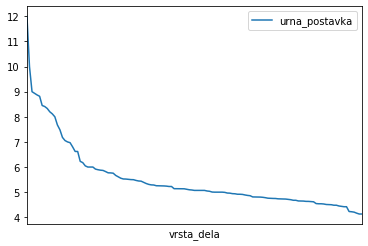

In [7]:
%matplotlib inline
povprecne_postavke.plot.line(y='urna_postavka', xticks=[])

Z grafa lahko vidimo, da ima velika večina vrst dela urno postavko nekje med 4 in 6 EUR. Le redke vrste dela (predavanje in urejanje besedil) imajo povprečno urno posavko višjo od 9 EUR.

## Odvisnost urnih postavk od regije
Oglejmo si, kakšne so urne postavke v različnih slovenskih regijah.

In [8]:
filtered.groupby('regija').mean().sort_values('urna_postavka', ascending=False)

,urna_postavka,st_mest,sifra
regija,,,
kraška regija,16.500,1.0,304089.0
bistra,12.000,1.0,289616.0
prekmurje,10.835,1.5,300177.5
"brežice, krško",10.000,1.0,308569.0
maribor ali od doma,10.000,2.0,306588.0
...,...,...,...
ljubljana (btc),4.130,5.0,284648.0
videm dobrepolje,4.130,1.0,301524.0
domžale okolica,4.130,1.0,305777.0


Tabela nam pove nekaj zelo zanimivih stvari:
- Razlike v povprečni postavki so večje med različnimi regijami kot pa med različnimi vrstami dela.
- Povprečna urna postavka očitno ni odvisna od gostote poseljenosti regije. Najvišje urne postavke so na krasu, v prekmurju in krškem, ki niso zelo gosto poseljena. V nasprotju pa so urne postavke v Ljubljani in Domžalah med najnižjimi, kljub temu da sta kraja zelo gosto poseljena.

Pripomniti moramo, da podatki niso najboljši, saj so včasih isti oziroma podobni kraji navedeni kot različni (npr. *domžale okolica* in *domžale - okolica*, *ljubljana* in *ljubljana (btc)*, itd.). Prav tako imamo za nekatere kraje premalo podatkov, zato menim, da druge hipoteze ne moremo z gotovostjo potrditi ali ovreči.

## Odvisnost urnih postavk od delovnika

Poglejmo si še, kakšna je povezava med povprečnimi urnimi postavkami in različnimi delovniki.

In [10]:
filtered.groupby('delovnik').mean().sort_values('urna_postavka', ascending=False)

,urna_postavka,st_mest,sifra
delovnik,,,
popoldan,5.706793,1.902174,299671.369565
vseeno,5.466000,1.800000,274377.200000
po dogovoru,5.440010,1.820641,299457.645291
med vikendom,5.331871,1.993548,298762.380645
dopoldan,5.209546,1.528600,304207.307692
izmensko,4.970701,1.954023,299552.580460


Vidimo, da so razlike v urnih postavkah med delovniki minimalne, torej lahko tretjo hipotezo ovržemo.

## Komentarji in vrsta dela 

Za zabavo si poglejmo še, ali lahko iz komentarja napovemo vrsto dela oglasa. Ker gre za klasifikacijski problem, bomo uporabili klasifikator, v našem primeru logistično regresijo. Pomagali si bomo s knjižnico [scikit-learn](https://scikit-learn.org/stable/).

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# najprej moramo pretvoriti DataFrame object v numpy array
komentar_np = filtered.komentar.to_numpy(dtype=str)
vrsta_dela_np = filtered.vrsta_dela.to_numpy(dtype=str)

# razdelimo podatke v dela za učenje in del za preverjanje
komentar_train, komentar_test, vrsta_dela_train, vrsta_dela_test = train_test_split(
    komentar_np, vrsta_dela_np, test_size=0.20, random_state=1000)

# ker so vhodni podatki stavki, jih moramo najprej spremeniti v številsko matriko
vectorizer = CountVectorizer()
vectorizer.fit(komentar_train)
x_train = vectorizer.transform(komentar_train)
x_test = vectorizer.transform(komentar_test)

In [11]:
from sklearn.linear_model import LogisticRegression

# definiramo naš klasifikator in ga učimo na učnih podatkih
model = LogisticRegression()
model.fit(x_train, vrsta_dela_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# na testnih podatkih preverimo, kako dobro se je klasifikator naučil
model.score(x_test, vrsta_dela_test)

0.6121323529411765

Vidimo, da smo s preprosto logistično regresijo dosegli 61% natančnost, kar ni slabo. Natančnost bi verjetno lahko še dodatno izboljšali, če bi optimizirali hiperparametre, uporabili boljše kodiranje besed v številsko matriko (*CountVectorizer* uporablja prinicp Bag Of Words) ali izbrali bolj zapleten klasifikator kot logistično regresijo. Posebej obetavne so konvolucijske nevronske mreže, ki bi bile glede na tip vhodnih podatkov verjetno dobra izbira, vendar je to žal izven obsega te analize.